In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [9]:
data=yf.download(['AAPL','MSFT','GOOGL'],period='6mo',interval='1d')['Close']

[*********************100%***********************]  3 of 3 completed


In [10]:
data

Ticker,AAPL,GOOGL,MSFT
Date,,,
2024-06-17,216.669998,177.240005,448.369995
2024-06-18,214.289993,175.089996,446.339996
2024-06-20,209.679993,176.300003,445.700012
2024-06-21,207.490005,179.630005,449.779999
2024-06-24,208.139999,179.220001,447.670013
...,...,...,...
2024-12-10,247.770004,185.169998,443.329987
2024-12-11,246.490005,195.399994,448.989990
2024-12-12,247.960007,191.960007,449.559998


In [19]:
def daily_return(data):
    daily_returns=pd.Series(index=data.index)
    for i in range (1,len(data)):
        daily_returns.iloc[i-1]=(data.iloc[i]-data.iloc[i-1])/data.iloc[i-1]
    return daily_returns

In [31]:
investment=10000/3
w0=investment//(data.iloc[0,0])
w1=investment//(data.iloc[0,1])
w2=investment//(data.iloc[0,2])
totalw=w0+w1+w2

In [32]:
wt0=w0/totalw
wt1=w1/totalw
wt2=w2/totalw

In [33]:
portfolio_return=(wt0*daily_return(data.iloc[:,0]))+(wt1*daily_return(data.iloc[:,1]))+(wt2*daily_return(data.iloc[:,2]))
portfolio_return                                                                              

Date
2024-06-17   -0.010370
2024-06-18   -0.005208
2024-06-20    0.006185
2024-06-21   -0.000673
2024-06-24    0.015035
                ...   
2024-12-10    0.025158
2024-12-11   -0.005464
2024-12-12   -0.005651
2024-12-13    0.022303
2024-12-16         NaN
Length: 127, dtype: float64

In [34]:
total_portfolio_value=portfolio_return.sum()
print(total_portfolio_value)

0.11774561703738892


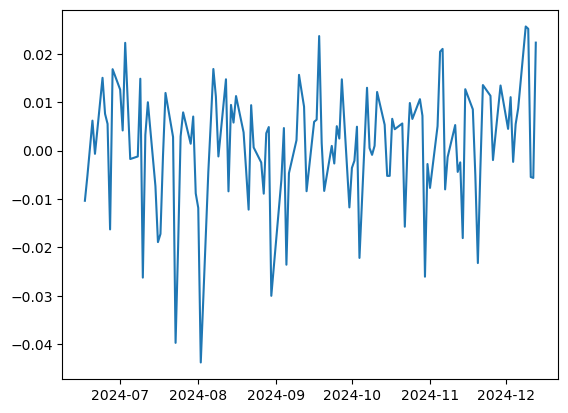

In [35]:
plt.plot(portfolio_return.index,portfolio_return)
plt.xlabel='Date'
plt.ylabel='Portfolio Return'
plt.show()